# Quantum Circuits

## Dependencies and Imports

In [1]:
# Read packages into Python library:
import pennylane as qml
from pennylane import numpy as np

## Introduction

Now that we have all of the basics of linear algebra and tensor products out of the way, let's have a look at multi-qubit gates in more depth and in the context of quantum circuits. Quantum circuits are diagrams that show how quantum logic gates act on qubits. They are a special case of a more general structure called **tensor networks**. We will talk about tensor networks, quantum complexity via entanglement entropy, and some of the historical motivations from various areas of physics in the appendix. For now, let's focus on some of the basics and how to interpret quantum circuit diagrams.

## Circuit Diagrams of Common Gates

In this section we will use the operators listed below in circuit diagrams in order to learn to convert quantum circuit diagrams into linear algebra operations. 

### Pauli Gates 

\begin{align}
X = \begin{pmatrix}0&1 \\ 1&0\end{pmatrix}, \quad
Y=\begin{pmatrix}0&-i \\ i&0\end{pmatrix}, \quad 
Z=\begin{pmatrix}1&0 \\ 0&-1 \end{pmatrix}, \quad
I=\begin{pmatrix}1&0 \\ 0&1 \end{pmatrix} 
\end{align}

![x_gate.png](x_gate.png)
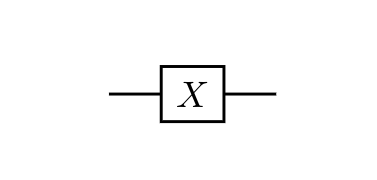

![y_gate.png](y_gate.png)
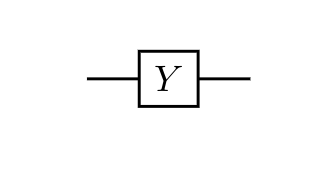

![z_gate.png](z_gate.png)
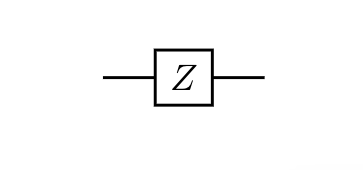

![identity_gate.png](identity_gate.png)
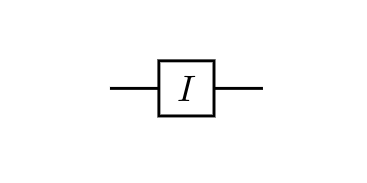

### The Hadamard Gate

\begin{align}
H = \frac{1}{\sqrt{2}}
\begin{pmatrix}1 & 1 \\ 1 & -1 \end{pmatrix}
\end{align}

![h_gate.png](h_gate.png)
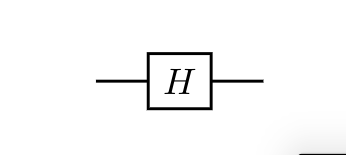

### The "CNOT" Gate

\begin{align}
\mathbf{CX} = 
\begin{pmatrix} I & 0 \\ 0 & X \end{pmatrix} = \begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0 \end{pmatrix}
\end{align}

![ctrl_not.png](ctrl_not.png)
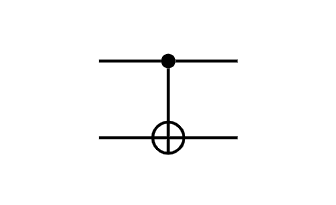

As an example, let's try converting the following circuit diagram into linear algebra:

![h_x.png](h_x.png)
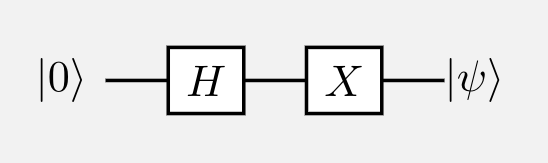

\begin{align}
  X \cdot H |0\rangle &= X \cdot H \cdot \begin{pmatrix}1 \\ 0\end{pmatrix} \\
  &=  \frac{1}{\sqrt{2}}\begin{pmatrix} 0 & 1 \\ 1 & 0\end{pmatrix} \begin{pmatrix} 1 & 1 \\ 1 & -1\end{pmatrix} \begin{pmatrix}1 \\ 0\end{pmatrix} \\
  &= \frac{1}{\sqrt{2}}\begin{pmatrix} 0 & 1 \\ 1 & 0\end{pmatrix} \begin{pmatrix}1\\1 \end{pmatrix} \\
  &= \frac{1}{\sqrt{2}}\begin{pmatrix}1\\1 \end{pmatrix}\\
  &= \begin{pmatrix}1/\sqrt{2}\\1/\sqrt{2} \end{pmatrix}\\
  &= \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\\
  &= |r\rangle \quad (\text{spin-right in the X-basis})\\
  &= |\psi \rangle
\end{align}

In code, we can construct a PennyLane `qnode()` that performs these gate operations and then samples the circuit

In [2]:
# Create a device to run the code
dev = qml.device("default.qubit", wires=1, shots=1)

#Create the qnode
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=[0])
    qml.PauliX(wires=[0])
    return qml.sample(qml.PauliX(0))

print(circuit())

1


Notice, we compute the sample in the $X$-basis by having the `qnode()` return `qml.sample(qml.PauliX(0))`. In the previous chapter, we always sampled using the $Z$-basis by having the circuit return `qml.sample(qml.PauliZ(0))` We will discuss this in more depth when we talk about **measurements** and **expectation values**. Since the result of the circuit gave the state 
\begin{align}
|\psi \rangle &= |r \rangle \\
&= \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
\end{align}

the sampling returned a "$+1$" value. If we instead run the same curcuit, but prepare the intitial state to be $|1\rangle$ we will get a different result:

In [3]:
#Define an array corresponding to the initial state |1>
u = np.array([1])

#Create the qnode
@qml.qnode(dev)
def circuit():
    qml.BasisState(u, wires=[0])
    qml.Hadamard(wires=[0])
    qml.PauliX(wires=[0])
    return qml.sample(qml.PauliX(0))

print(circuit())

-1


Working through the linear algebra, we get the following:

\begin{align}
X\cdot H |1\rangle &= X \cdot H \cdot \begin{pmatrix} 0\\1 \end{pmatrix}\\
&= \frac{1}{\sqrt{2}}\begin{pmatrix}0&1\\1&0 \end{pmatrix}\begin{pmatrix}1&1\\1&-1 \end{pmatrix}\begin{pmatrix}0\\1 \end{pmatrix}\\
&= \frac{1}{\sqrt{2}}\begin{pmatrix}0&1\\1&0 \end{pmatrix}\begin{pmatrix}1\\-1 \end{pmatrix}\\
&= \frac{1}{\sqrt{2}}\begin{pmatrix}1\\-1 \end{pmatrix}\\
&= \frac{1}{\sqrt{2}}(|0\rangle -|1\rangle)\\
&= |l\rangle
\end{align}

So, we should indeed expect a sample value of "$-1$" when measuring in the $X$-basis. 

Let's work through another example. Let's take the following diagram and convert it to linear algebra:

![y_z.png](y_z.png)
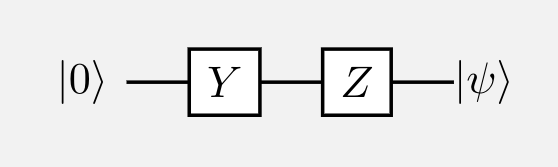

\begin{align}
    Z \cdot Y |0\rangle &= Z \cdot Y \cdot \begin{pmatrix}1\\0\end{pmatrix} \\
    &= \begin{pmatrix}1&0 \\ 0&-1 \end{pmatrix} \begin{pmatrix} 0 & -i \\ i & 0\end{pmatrix} \begin{pmatrix}1\\0\end{pmatrix}\\
    &= \begin{pmatrix}1&0 \\ 0&-1 \end{pmatrix}\begin{pmatrix}0\\i\end{pmatrix}\\
    &= \begin{pmatrix}0\\-i\end{pmatrix}\\
    &= |\psi \rangle
\end{align}

Notice, 

\begin{align}
\begin{pmatrix}
0\\-i
\end{pmatrix} = 
-i \begin{pmatrix}
0 \\ 1
\end{pmatrix} = 
-i |1\rangle 
\end{align}

We can write a circuit that performs these operations, and then samples the circuit in the $Z$-basis:

In [4]:
#Create the qnode
@qml.qnode(dev)
def circuit():
    qml.PauliY(wires=[0])
    qml.PauliZ(wires=[0])
    return qml.sample(qml.PauliZ(0))

print(circuit())

-1


Due to the way measurements behave, we are always going to get a value of "$-1$" when sampling the state $-i|1\rangle$. We'll explain why later on. We can write a circuit that performs these operations, and then samples the circuit in the $X$-basis:

In [5]:
#Create the qnode
@qml.qnode(dev)
def circuit():
    qml.PauliY(wires=[0])
    qml.PauliZ(wires=[0])
    return qml.sample(qml.PauliX(0))

print(circuit())

-1


In this `qnode()`, the $X$-basis sample value is a quantum phenomenon not seen in classical phsyics. In fact if we run the circuit several times by defining a new "20-shot device" we will see that we get a mixture of "$+1$" and "$-1$" sample values:

In [6]:
# Create a device to run the code
dev2 = qml.device("default.qubit", wires=1, shots=20)

#Create the qnode
@qml.qnode(dev2)
def circuit():
    qml.PauliY(wires=[0])
    qml.PauliZ(wires=[0])
    return qml.sample(qml.PauliX(0))

print(circuit())

[ 1 -1 -1  1  1  1 -1  1 -1  1  1  1 -1 -1  1 -1  1  1  1  1]


Explaining this strange behavior of measuring something different each time and not getting a single sample value for every measurement is something we will dig into when discussing measurements. Even though we can work out a unique pure state using linear algebra, measurements behave in a way me might not intially expect. In order to get the uniqe pure state out of the measurement, we have to perform a measurement in the basis defined by that state. 

Let's have a look at a more complicated circuit involving two qubits now:

![00_cnot.png](00_cnot.png)
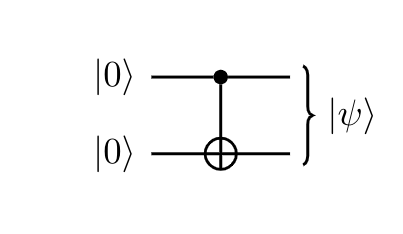

Let's work out the linear algebra:

\begin{align}
\mathbf{CX}|00\rangle 
&= 
\begin{pmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
\begin{pmatrix} 1\\0\\0\\0 \end{pmatrix} \\
&= \begin{pmatrix} 1\\0\\0\\0 \end{pmatrix} \\
&= |00\rangle \\
&= |\psi \rangle 
\end{align}

Now, let's write a circuit that performs these operations and samples the circuit in the $Z$-basis one time. We will need a device with two wires, and we have to tell the `qml.CNOT()` function which wires to operate on:

In [7]:
# Create a device to run the code
dev3 = qml.device("default.qubit", wires=2, shots=1)

#Create the qnode
@qml.qnode(dev3)
def circuit():
    qml.CNOT(wires=[0,1])
    return qml.sample(qml.PauliZ(0))

print(circuit())

1


Let's do the almost same thing but lets make the following change to the circuit:

![10_cnot.png](10_cnot.png)
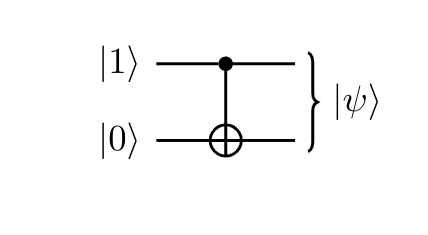

This is prepared in the $|10 \rangle$ basis state, so we should expect a different outcome state. Let's have a look at the math:

\begin{align}
\mathbf{CX}|10\rangle &= 
\begin{pmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
\begin{pmatrix} 0\\0\\1\\0 \end{pmatrix}\\
&= \begin{pmatrix} 0\\0\\0\\1 \end{pmatrix}\\
&= |11\rangle \\
&= |\psi \rangle
\end{align}

As we can see, the second qubit value is flipped now. Let's build a circuit that performs these operations an samples in the $Z$-basis on both qubits once: 

In [8]:
# Create a device to run the code
dev3 = qml.device("default.qubit", wires=2, shots=1)

# Define an array corresponding to the initial basis state:
ud = np.array([1,0])

#Create the qnode
@qml.qnode(dev3)
def circuit():
    qml.BasisState(ud, wires=[0,1])
    qml.CNOT(wires=[0,1])
    return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))

print(circuit())

[[-1]
 [-1]]


We can see, since the final state is $|\psi \rangle = |11\rangle$, we get "$-1$" sample values for the functions

```
qml.sample(qml.PauliZ(0))
qml.sample(qml.PauliZ(1))
```

In general, if we perform the **CNOT** operation on two qubits in some initial basis state we get the following output states:

\begin{align}
\mathbf{CX}|00 \rangle &= |00\rangle \\
\mathbf{CX}|01 \rangle &= |01\rangle \\
\mathbf{CX}|10 \rangle &= |11\rangle \\
\mathbf{CX}|11 \rangle &= |10\rangle
\end{align}

It is important to mention at this point that the following circuit diagram:

![h_blank.png](h_blank.png)
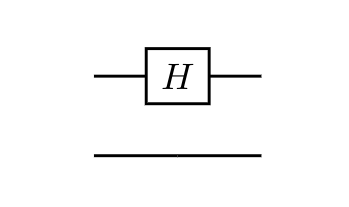

Is equivalent to this diagram:

![h_i.png](h_i.png)
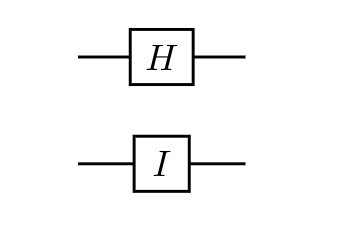

Much more complicated examples can of course be created, but the general idea remains the same. Absence of a gate means the identity gate. We generally can stack gates to get their tensor product. For example the following circuit:

![00_hh.png](00_hh.png)
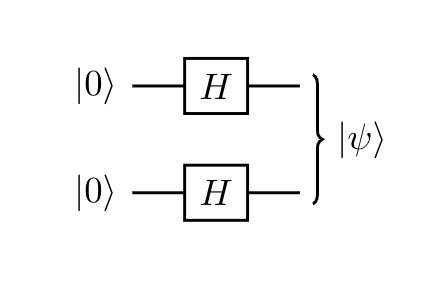

Can be interpreted in terms of linear algebra as follows:

\begin{align}
(H \otimes H)|00\rangle &= 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} \otimes 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} 
\left(
\begin{pmatrix}
1 \\ 0
\end{pmatrix} \otimes 
\begin{pmatrix}
1 \\ 0
\end{pmatrix}
\right) \\
&= \frac{1}{2}
\begin{pmatrix}
1 & 1 & 1 & 1 \\
1 & -1 & 1 & -1 \\
1 & 1  & -1 & -1 \\
1 & -1 & -1 & 1
\end{pmatrix}
\begin{pmatrix}
1 \\ 0 \\ 0 \\ 0
\end{pmatrix} \\
&= \begin{pmatrix} 1/2 \\ 1/2 \\ 1/2 \\ 1/2 \end{pmatrix}
\end{align}

This can also be computer in a slightly different but completely equivalent way which may be easier for some people to parse:

\begin{align}
(H \otimes H)|00\rangle &= H|0\rangle \otimes H|0 \rangle \\
&= \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} \begin{pmatrix} 1\\0 \end{pmatrix} \otimes 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} \begin{pmatrix} 1\\0 \end{pmatrix} \\
&= \frac{1}{2}\left(
\begin{pmatrix} 1\\1 \end{pmatrix} \otimes
\begin{pmatrix} 1\\1 \end{pmatrix}
\right) \\
&= \begin{pmatrix} 1/2 \\ 1/2 \\ 1/2 \\ 1/2 \end{pmatrix}
\end{align}

Let's implement this in PennyLane but with the initial basis state $|10\rangle$:

In [9]:
# Create a device to run the code
dev3 = qml.device("default.qubit", wires=2, shots=1)

# Define an array corresponding to the initial basis state:
ud = np.array([1,0])

#Create the qnode
@qml.qnode(dev3)
def circuit():
    qml.BasisState(ud, wires=[0,1])
    qml.Hadamard(wires=[0])
    qml.Hadamard(wires=[1])
    return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))

print(circuit())

[[-1]
 [-1]]


Let's look at one final example that is more complicated:

![complicated_example.png](complicated_example.png)
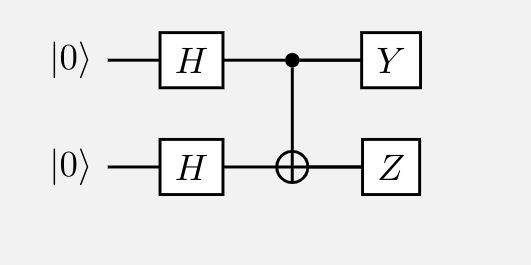

This one is a little tricky if you don't know about tensor products so let's go through it very carefully. First, operate on each qubit with the Hadamard gate to turn the "ket-$0$" into a superposition:

\begin{align}
H |0\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1&1 \\ 1&-1\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix}  = \frac{1}{\sqrt{2}} \begin{pmatrix} 1\\1 \end{pmatrix}.
\end{align}

Now, take the two qubits in superposition (two copies of the above computation), and take their tensor product:

\begin{align}
    H|0\rangle \otimes H|0\rangle &= \frac{1}{\sqrt{2}}\begin{pmatrix} 1\\1 \end{pmatrix} \otimes \frac{1}{\sqrt{2}} \begin{pmatrix} 1\\1 \end{pmatrix}\\ 
    &= \frac{1}{2}\begin{pmatrix} 1\\1\\1\\1 \end{pmatrix}\\
    &= \begin{pmatrix} 1/2\\1/2\\1/2\\1/2 \end{pmatrix}
\end{align}

Next, operate on this by the $\mathbf{CNOT}$-gate 

\begin{align}
\begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} 1/2\\1/2\\1/2\\1/2 \end{pmatrix} = 
\begin{pmatrix} 1/2\\1/2\\1/2\\1/2 \end{pmatrix}
\end{align}

Next, we operate on the tensor product vector with the operator $Y \otimes Z$:

\begin{align}
Y \otimes Z \begin{pmatrix}
1/2 \\ 1/2 \\ 1/2 \\ 1/2
\end{pmatrix} 
&= \begin{pmatrix}0&-i \\ i&0\end{pmatrix} \otimes \begin{pmatrix}1&0 \\ 0&-1 \end{pmatrix} \begin{pmatrix}
1/2 \\ 1/2 \\ 1/2 \\ 1/2
\end{pmatrix} \\
&= \begin{pmatrix}
0 & 0 & -i & 0 \\
0 & 0 & 0 & i \\
i & 0 & 0 & 0 \\
0 & -i & 0 & 0
\end{pmatrix}\begin{pmatrix}
1/2 \\ 1/2 \\ 1/2 \\ 1/2
\end{pmatrix} \\
&= \begin{pmatrix}
-i/2 \\ i/2 \\ i/2 \\ -i/2
\end{pmatrix}
\end{align}

Now, let's implement some PennyLane code to do the same operations on two qubits:

In [10]:
# Create a device to run the code
dev3 = qml.device("default.qubit", wires=2, shots=1)

#Create the qnode
@qml.qnode(dev3)
def circuit():
    qml.Hadamard(wires=[0])
    qml.Hadamard(wires=[1])
    qml.CNOT(wires=[0,1])
    qml.PauliY(wires=[0])
    qml.PauliZ(wires=[1])
    return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))

print(circuit())

[[-1]
 [ 1]]


### Exercises

1. Write PennyLane code to construct and measure the following circuit in the $Z$-basis. Compute the linear algebra by hand to see the output states. 

![h_z.png](h_z.png)
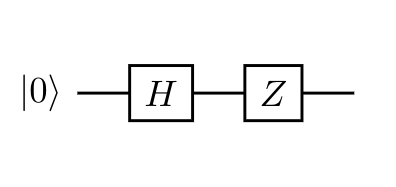

2. Write PennyLane code to construct and measure the following circuit in the $Z$-basis. Compute the linear algebra by hand to see the output states. 

![x_y.png](x_y.png)
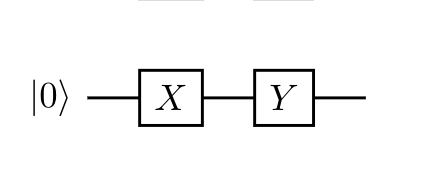

3. Write PennyLane code to construct and measure the following circuit in the $Z$-basis. Compute the linear algebra by hand to see the output states. 

![x_h_y.png](x_h_y.png)
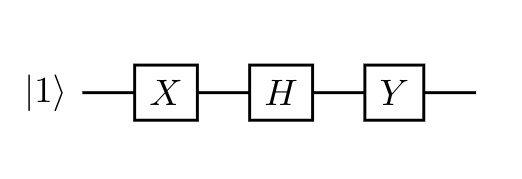

4. Write PennyLane code to construct and measure the following circuit in the $Z$-basis. Compute the linear algebra by hand to see the output states. 

![hh_cnot.png](hh_cnot.png)
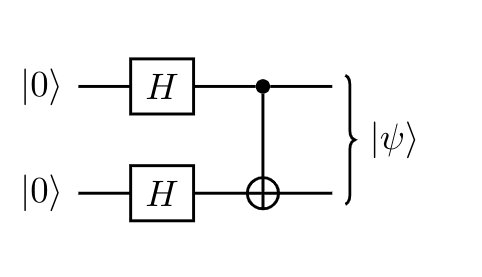

5. Write PennyLane code to construct and measure the following circuit in the $Z$-basis. Compute the linear algebra by hand to see the output states. 

![hh_zy.png](hh_zy.png)
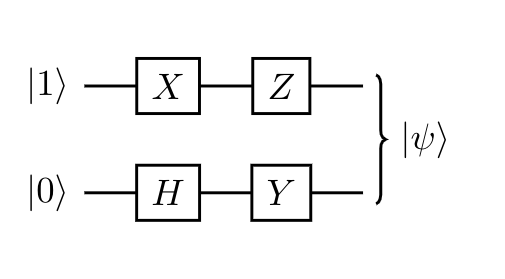

6. Write PennyLane code to construct and measure the following circuit in the $Z$-basis. Compute the linear algebra by hand to see the output states. 

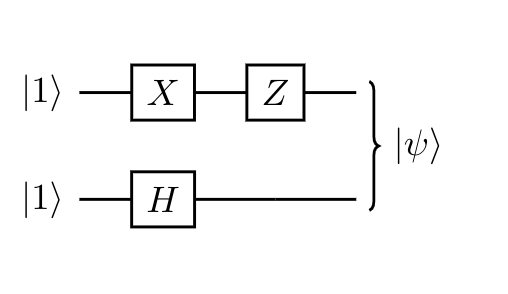

## Circuits in Qiskit

### Imports and Dependencies

In [1]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [2]:
from qiskit import *

### Defining a Circuit in Qiskit

In Qiskit we can define quantum bits (qubits) as well as classical bits in a circuit. Do to this we use the `QuantumCircuit()` function. Let's define a circuit with three qubits on which to operate, as well as three bits.  

In [6]:
circuit = QuantumCircuit(3,3)

In order to plot circuit diagrams, we can use `matplotlib` and the `circuit.draw()` functions. In the following code, we put in a "barrier" using the `circuit.barrier()` function. This is just a way of visually breaking up the circuit diagram. The circuit diagram here will be drawn with the qubits first, followed by the classical bits at the bottom. The fact that there are three classical bits of information is indicated by a slash with a three above it. 

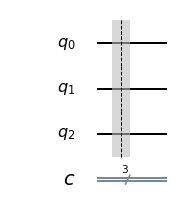

In [7]:
%matplotlib inline
circuit.barrier()
circuit.draw(output='mpl')

Now, let's apply some gates to our circuit. We will apply a Pauli-X gate to qubit 0, a Hadamard gate to qubit 1, and a CNOT gate from qubit 1 to qubit 2. We will then draw a barrier to show what we've added to the circuit and redraw the circuit. 

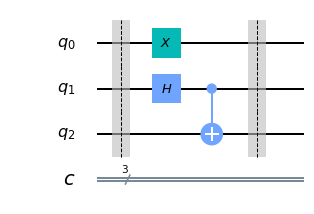

In [8]:
circuit.x(0)
circuit.h(1)
circuit.cx(1,2)
circuit.barrier()
circuit.draw(output='mpl')

Now, let's apply a Pauli-Y gate to qubit 1, a Pauli-Z gate to qubit 2, and a controlled-Z gate from qubit 0 to qubit 2. Let's add another barrier to indicate what we've added to the circuit, and let's redraw the circuit. 

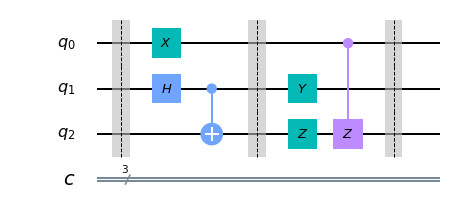

In [9]:
circuit.y(1)
circuit.z(2)
circuit.cz(0,2)
circuit.barrier()
circuit.draw(output='mpl')

### Exercises

1. Define a quantum circuit in Qiksit with four qubits and one classical bit.
2. On your circuit, apply a Hadamard gate to qubit 0 and qubit 2. Add a barrier after these two Hadamard gates. 
3. Print the circuit diagram of your circuit. 
4. Apply the CNOT-gate from qubit 1 to qubit 3, then apply the Pauli-Y gate to qubit 1. 
5. Add another barrier and print your circuit diagram. 

## References

- [PennyLane.ai](https://pennylane.ai/)
- [Qiskit](https://qiskit.org/)
- [Coding in Qiskit on YouTube](https://www.youtube.com/playlist?list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY)
- [Qiskit on Medium](https://medium.com/qiskit)
- [Quantikz for Circuit Diagrams in LaTeX](https://arxiv.org/abs/1809.03842)
- [Xanadu on Medium](https://medium.com/xanaduai)
- [PennyLane on Medium](https://medium.com/xanaduai/training-quantum-neural-networks-with-pennylane-pytorch-and-tensorflow-c669108118cc)
- [PennyLane YouTube Video](https://www.youtube.com/watch?v=tvVnjVa3ErY)